<a href="https://colab.research.google.com/github/needs-searcher/RL_Example/blob/master/Cliff_v4_policyImprovementRevise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# rule
# undiscounted, episodic
# start, goal states exist
# actions : up, down, right, left
# R = -1 at all transition
# R = -100 at cliff region and go to start point

In [11]:
import numpy as np
from collections import defaultdict

gamma = 1
alpa = 0.1
#epsilon = 0.1

# define state
start_key = (3,0)
state = defaultdict(lambda : 0)

for i in range(4):
    for j in range(12):
        if i == 3 and j>=1 and j<11:
            state[(i,j)] = -1
        else:
            state[(i,j)] = 0

# define action 
actions = ["up", "down", "left", "right"]

In [12]:
# s' function
def nxtstateKey(state_key, action):
  origin = state_key
  nxt_key_row = state_key[0]
  nxt_key_col = state_key[1]
  if action == 'up':
    nxt_key_row -= 1
  elif action == 'down':
    nxt_key_row += 1
  elif action == 'left':
    nxt_key_col -= 1
  elif action == 'right':
    nxt_key_col += 1
  if nxt_key_row >= 0 and nxt_key_row <= 3:
    if nxt_key_col >= 0 and nxt_key_col <= 11:
      return (nxt_key_row, nxt_key_col)
    else:
      return origin
  else:
    return origin

# reward function
def reward(next_state_key):
    if state[next_state_key] == -1:
        return -100
    else:
        return -1

In [26]:
# Q talbe intialize
Q_table_SARSA = defaultdict(lambda : 0)
pi_table_SARSA = defaultdict(lambda : 0)
Q_table_Q_learning = defaultdict(lambda : 0)
pi_table_Q_learning = defaultdict(lambda : 0)

rewardSumList_SARSA = []
rewardSumList_Q_learning = []

In [14]:
# choose action on epsilon-greedy-policy
def chooseAction(state_key, Q_table, epsilon):
    if np.random.uniform(0,1) <= epsilon:
        return np.random.choice(actions)
    else:
        Q_up = Q_table[(state_key,'up')]
        Q_down = Q_table[(state_key,'down')]
        Q_left = Q_table[(state_key,'left')]
        Q_right = Q_table[(state_key,'right')]
        QList = [Q_up, Q_down, Q_left, Q_right]
        ind = QList.index(max(QList))
        return actions[ind] # actions = ["up", "down", "left", "right"]

In [15]:
# SARSA control
def play_episode_SARSA(start_key, actions):
  episode = []
  rewardList_SARSA = []
  state_key = start_key
  while True:
    if state[state_key] == -1: # if state is cliff state, break
      #print('cliff! end game')
      episode.append(state_key)
      break
    a = chooseAction(state_key, Q_table_SARSA, 0.1)
    s_prime_key = nxtstateKey(state_key, a)
    r = reward(s_prime_key)
    rewardList_SARSA.append(r) # for making episode-reward graph
    episode.append([state_key,a,r])
    a_prime = chooseAction(s_prime_key, Q_table_SARSA, 0.1)
    Q_table_SARSA[state_key,a] = Q_table_SARSA[state_key,a] + alpa*(r + gamma*Q_table_SARSA[s_prime_key,a_prime]-Q_table_SARSA[state_key,a])
    state_key = s_prime_key
    a = a_prime
    if state_key == (3,11):
      #print('Goal!!!')
      episode.append(state_key)
      break
  #print(episode)
  rewardSumList_SARSA.append(sum(rewardList_SARSA))
  #print(rewardSumList_SARSA)

In [16]:
# Q-learning control
def play_episode_Qlearning(start_key, actions):
  episode = []
  rewardList_Q_learning = []
  state_key = start_key
  while True:
    if state[state_key] == -1:
      #print('cliff! end game')
      episode.append(state_key)
      break
    a = chooseAction(state_key, Q_table_Q_learning, 0.1)
    s_prime_key = nxtstateKey(state_key, a)
    r = reward(s_prime_key)
    rewardList_Q_learning.append(r) # for making episode-reward graph
    episode.append([state_key,a,r])
    a_optimal = chooseAction(s_prime_key, Q_table_Q_learning, 0)
    Q_table_Q_learning[state_key,a] = Q_table_Q_learning[state_key,a] + alpa*(r + gamma*Q_table_Q_learning[s_prime_key,a_optimal]-Q_table_Q_learning[state_key,a])
    state_key = s_prime_key
    if state_key == (3,11):
      #print('Goal!!!')
      episode.append(state_key)
      break
  #print(episode)
  rewardSumList_Q_learning.append(sum(rewardList_Q_learning))
  #print(rewardSumList_Q_learning)

In [27]:
# play episode on SARSA control
count = 50000
for _ in range(count):
    play_episode_SARSA(start_key, actions)

In [28]:
# play episode on Q-learning control
for _ in range(count):
    play_episode_Qlearning(start_key, actions)

In [29]:
# pi_table_SARSA update 
for i in range(4):
  for j in range(12):
    Q_up = Q_table_SARSA[((i,j),'up')]
    Q_down = Q_table_SARSA[((i,j),'down')]
    Q_left = Q_table_SARSA[((i,j),'left')]
    Q_right = Q_table_SARSA[((i,j),'right')]
    QList = [Q_up,Q_down,Q_left,Q_right]
    ind = QList.index(max(QList))
    pi_table_SARSA[(i,j)] = actions[ind] # actions = ["up", "down", "left", "right"]

# pi_table_Qlearning update 
for i in range(4):
  for j in range(12):
    Q_up = Q_table_Q_learning[((i,j),'up')]
    Q_down = Q_table_Q_learning[((i,j),'down')]
    Q_left = Q_table_Q_learning[((i,j),'left')]
    Q_right = Q_table_Q_learning[((i,j),'right')]
    QList = [Q_up,Q_down,Q_left,Q_right]
    ind = QList.index(max(QList))
    pi_table_Q_learning[(i,j)] = actions[ind] # actions = ["up", "down", "left", "right"]

In [30]:
# draw pi_table_SARSA on gridworld
for i in range(4):
  print('-------------------------------------------------------------')
  out = '| '
  for j in range(12):
    if pi_table_SARSA[(i,j)] == 'up':
      token = '↑'
    if pi_table_SARSA[(i,j)] == 'down':
      token = '↓'
    if pi_table_SARSA[(i,j)] == 'right':
      token = '→'
    if pi_table_SARSA[(i,j)] == 'left':
      token = '←'
    if state[(i,j)] == -1:
      token = '**'
    #if (i, j) == (3,0):
    #  token = ' S '
    if (i, j) == (3,11):
      token = ' G '
    out += token + ' | '
  print(out)
print('-------------------------------------------------------------')

-------------------------------------------------------------
| → | → | → | → | → | → | → | → | → | → | → | ↓ | 
-------------------------------------------------------------
| ↑ | → | ↑ | ↑ | ↑ | → | → | → | → | → | → | ↓ | 
-------------------------------------------------------------
| ↑ | ↑ | ↑ | ↑ | ↑ | ↑ | ↑ | ↑ | ↑ | ↑ | → | ↓ | 
-------------------------------------------------------------
| ↑ | ** | ** | ** | ** | ** | ** | ** | ** | ** | ** |  G  | 
-------------------------------------------------------------


In [31]:
# draw pi_table_Qlearning on gridworld
for i in range(4):
  print('-------------------------------------------------------------')
  out = '| '
  for j in range(12):
    if pi_table_Q_learning[(i,j)] == 'up':
      token = '↑'
    if pi_table_Q_learning[(i,j)] == 'down':
      token = '↓'
    if pi_table_Q_learning[(i,j)] == 'right':
      token = '→'
    if pi_table_Q_learning[(i,j)] == 'left':
      token = '←'
    if state[(i,j)] == -1:
      token = '**'
    #if (i, j) == (3,0):
      #token = ' S '
    if (i, j) == (3,11):
      token = ' G '
    out += token + ' | '
  print(out)
print('-------------------------------------------------------------')

-------------------------------------------------------------
| ↓ | → | → | → | ↓ | → | → | ↓ | → | → | ↓ | ↓ | 
-------------------------------------------------------------
| ↓ | ↓ | ↓ | ↓ | ↓ | ↓ | ↓ | ↓ | ↓ | ↓ | ↓ | ↓ | 
-------------------------------------------------------------
| → | → | → | → | → | → | → | → | → | → | → | ↓ | 
-------------------------------------------------------------
| ↑ | ** | ** | ** | ** | ** | ** | ** | ** | ** | ** |  G  | 
-------------------------------------------------------------


(9900.0, 10000.0)

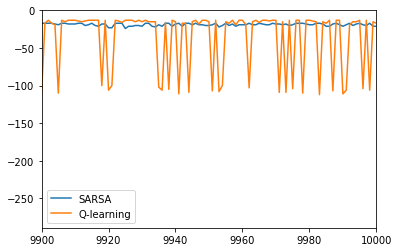

In [38]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
episode_count = []
for i in range(count):
    episode_count.append(i+1)
plt.plot(episode_count,rewardSumList_SARSA, label='SARSA')
plt.plot(episode_count,rewardSumList_Q_learning, label='Q-learning')
plt.legend()
plt.xlim(9900,10000)